In [12]:
import pandas as pd 
import os
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import sys
print(sys.version)

3.7.16 (default, Jan 17 2023, 09:28:58) 
[Clang 14.0.6 ]


In [13]:
1/np.random.lognormal(1.21, 0.23)

0.302690699137564

## Normals and log normals 

Text(0, 0.5, 'Density')

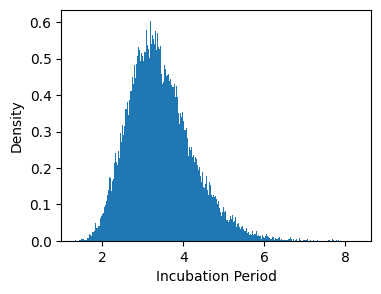

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
std = 0.23
m=1.21
x = np.linspace(0,10, 100)

points = np.random.lognormal(m, std, size = (100000, 1))
ax.hist(points, bins = 1000, density=True);
ax.set_xlabel('Incubation Period')
ax.set_ylabel('Density')

Text(0, 0.5, 'Density')

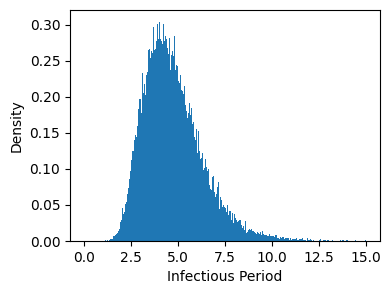

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
std = 0.33
m=1.5
x = np.linspace(0,10, 100)

points = np.random.lognormal(m, std, size = (100000, 1))
ax.hist(points, bins = 1000, density=True, range=(0,15));
ax.set_xlabel('Infectious Period')
ax.set_ylabel('Density')

Text(0, 0.5, 'Density')

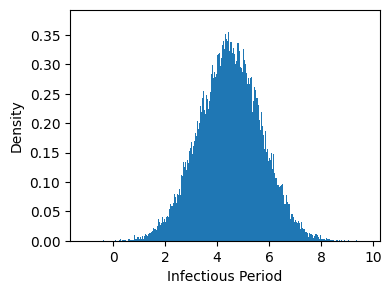

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
std = 1.2
m=4.5
x = np.linspace(0,10, 100)

points = np.random.normal(m, std, size = (100000, 1))
ax.hist(points, bins = 1000, density=True);
ax.set_xlabel('Infectious Period')
ax.set_ylabel('Density')

## Weibull 

Text(0, 0.5, 'Density')

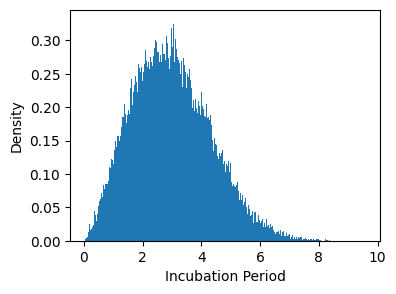

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
sigma = 3.38
alpha=2.35
x = np.linspace(0,10, 100)

points = np.random.weibull(alpha, size = (100000, 1))*sigma
ax.hist(points, bins = 1000, density=True);
ax.set_xlabel('Incubation Period')
ax.set_ylabel('Density')

Text(0, 0.5, 'Density')

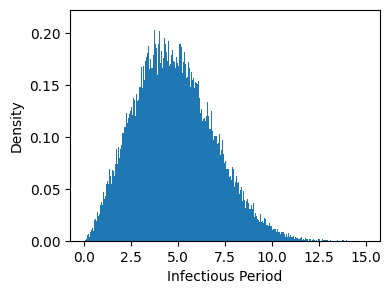

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
sigma = 5.42
alpha = 2.47
x = np.linspace(0,10, 100)

points = np.random.weibull(alpha, size = (100000, 1))*sigma
ax.hist(points, bins = 1000, density=True, range=(0,15));
ax.set_xlabel('Infectious Period')
ax.set_ylabel('Density')

0
0
0


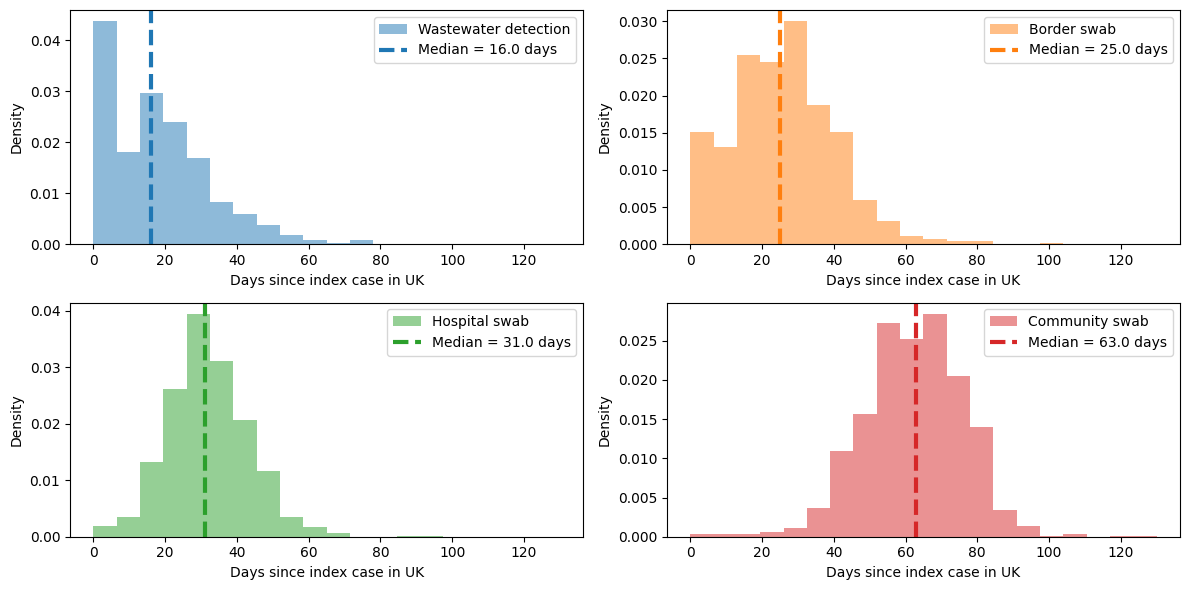

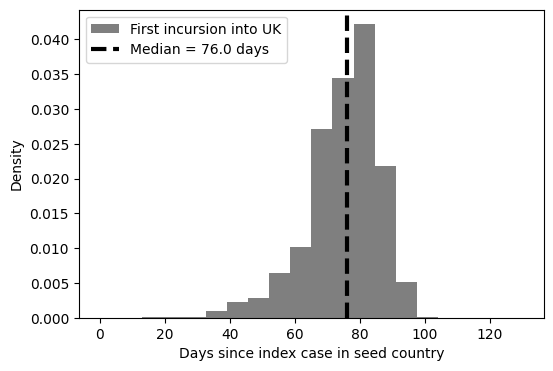

In [19]:

# PLOT RESULTS (time difference between first case in UK and first detection)

df = pd.read_csv(os.path.join('..', '..', 'models', 'simulated_data', "230228_testing_scan", "test.csv"))


phi = 0.2
com_tests = 100000
phi_c = com_tests/7/67e6
phi_h = 0.1

          

res = df.loc[(df.phi_h==phi_h)] 
t_detect = res['ww_time']
t_seed = res['seed_t']

t05, t25, t50, t75, t95 = np.quantile(t_seed, [0.05, 0.25, 0.5, 0.75, 0.95])
print(min(t_detect-t_seed))
diff_ww = t_detect-t_seed
wq05, wq25, wq50, wq75, wq95 = np.quantile(diff_ww, [0.05, 0.25, 0.5, 0.75, 0.95])


t_screen_b = res['bs_time']
t_seed = res['seed_t']
print(min(t_screen_b-t_seed))
diff_b = t_screen_b-t_seed
bq05, bq25, bq50, bq75, bq95 = np.quantile(t_screen_b-t_seed, [0.05, 0.25, 0.5, 0.75, 0.95])

res = df.loc[(df.phi_h==phi_h)]
t_screen_h = res['hs_time']
t_seed = res['seed_t']
diff_h = np.array(t_screen_h - t_seed)[np.array(t_screen_h - t_seed)>=0]

hq05, hq25, hq50, hq75, hq95 = np.quantile(diff_h, [0.05, 0.25, 0.5, 0.75, 0.95])

data = df.loc[np.isclose(df.phi_c,phi_c)]
t_screen_c = res['cs_time']
t_seed = res['seed_t']
print(min(t_screen_c-t_seed))
diff_c = t_screen_c-t_seed
cq05, cq25, cq50, cq75, cq95 = np.quantile(diff_c, [0.05, 0.25, 0.5, 0.75, 0.95])

# detect kde

detect_kde = gaussian_kde(t_detect-t_seed)
detect_kde.covariance_factor = lambda : .05
detect_kde._compute_covariance()
# screen kde

screen_b_kde = gaussian_kde(t_screen_b-t_seed)
screen_b_kde.covariance_factor = lambda : .05
screen_b_kde._compute_covariance()


screen_h_kde = gaussian_kde(diff_h)
screen_h_kde.covariance_factor = lambda : .05
screen_h_kde._compute_covariance()


screen_c_kde = gaussian_kde(t_screen_c-t_seed)
screen_c_kde.covariance_factor = lambda : .05
screen_c_kde._compute_covariance()

X = np.linspace(-25,130,200)

fig, ax = plt.subplots(2,2,figsize=(12,6))

#ax.plot(X, detect_kde(X), color='C0', ls='-', alpha=0.5, label='Wastewater detection')
#ax.plot(X, screen_b_kde(X), color='C1', ls='-', alpha=0.5, label='Border swab')
#ax.plot(X, screen_h_kde(X), color='C2', ls='-', alpha=0.5, label='Hospital swab')
#ax.plot(X, screen_c_kde(X), color='C3', ls='-', alpha=0.5, label='Community swab')
ax[0][0].hist(diff_ww, bins=20, color='C0', ls='-', alpha=0.5, label='Wastewater detection', density=True, range=(0,130))
ax[0][0].axvline(wq50, color='C0',ls='--',lw=3, label=f'Median = {wq50} days')

ax[0][1].hist(diff_b, bins=20, color='C1', ls='-', alpha=0.5, label='Border swab', density=True, range=(0,130))
ax[0][1].axvline(bq50, color='C1',ls='--', lw=3,label=f'Median = {bq50} days')

ax[1][0].hist(diff_h, bins=20, color='C2', ls='-', alpha=0.5, label='Hospital swab', density=True, range=(0,130))
ax[1][0].axvline(hq50, color='C2',ls='--', lw=3,label=f'Median = {hq50} days')

ax[1][1].hist(diff_c, bins=20, color='C3', ls='-', alpha=0.5, label='Community swab', density=True, range=(0,130))
ax[1][1].axvline(cq50, color='C3',ls='--', lw=3,label=f'Median = {cq50} days')

#ax.fill_between(X, detect_kde(X), color='C0', alpha=0.2)
#ax.fill_between(X, screen_b_kde(X), color='C1', alpha=0.2)
#ax.fill_between(X, screen_h_kde(X), color='C2', alpha=0.2)
#ax.fill_between(X, screen_c_kde(X), color='C3', alpha=0.2)

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].set_ylabel('Density')
        ax[i,j].set_xlabel('Days since index case in UK')
        ax[i,j].legend()

fig.tight_layout()
fig.savefig('fig1.png', dpi=400)
fig.savefig('fig1.pdf')

fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.hist(t_seed, bins=20, color='k', ls='-', alpha=0.5, label='First incursion into UK', density=True, range=(0,130))
ax.axvline(t50, color='k',ls='--',lw=3, label=f'Median = {t50} days')
ax.set_ylabel('Density')
ax.set_xlabel('Days since index case in seed country')
ax.legend()
fig.savefig('fig2.png', dpi=400)
fig.savefig('fig2.pdf')

0
0
0
0


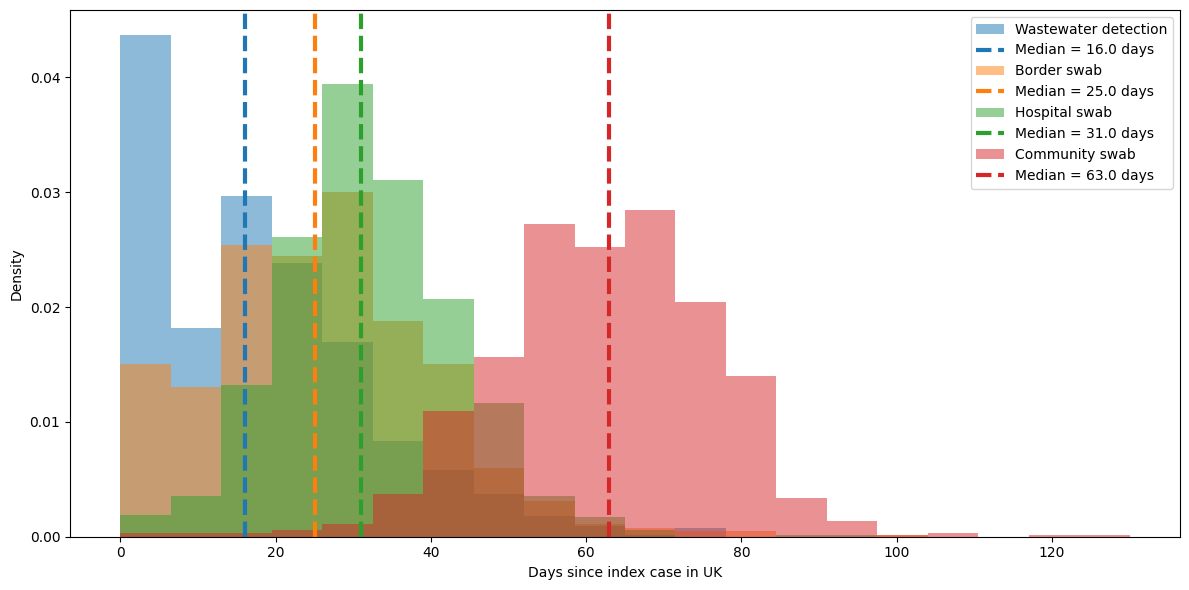

In [22]:

# PLOT RESULTS (time difference between first case in UK and first detection)


df = pd.read_csv(os.path.join('..', '..','models', 'simulated_data', '230228_testing_scan', 'test.csv'))

phi = 0.2
com_tests = 100000
phi_c = com_tests/7/67e6
phi_h = 0.1

          

res = df.loc[(df.phi_h==phi_h)] 
t_detect = res['ww_time']
t_seed = res['seed_t']
print(min(t_detect-t_seed))
diff_ww = t_detect-t_seed
wq05, wq25, wq50, wq75, wq95 = np.quantile(diff_ww, [0.05, 0.25, 0.5, 0.75, 0.95])


t_screen_b = res['bs_time']
t_seed = res['seed_t']
print(min(t_screen_b-t_seed))
diff_b = t_screen_b-t_seed
bq05, bq25, bq50, bq75, bq95 = np.quantile(t_screen_b-t_seed, [0.05, 0.25, 0.5, 0.75, 0.95])

res = df.loc[(df.phi_h==phi_h)]
t_screen_h = res['hs_time']
t_seed = res['seed_t']
diff_h = np.array(t_screen_h - t_seed)[np.array(t_screen_h - t_seed)>=0]
print(min(diff_h))
hq05, hq25, hq50, hq75, hq95 = np.quantile(diff_h, [0.05, 0.25, 0.5, 0.75, 0.95])

data = df.loc[np.isclose(df.phi_c,phi_c)]
t_screen_c = res['cs_time']
t_seed = res['seed_t']
print(min(t_screen_c-t_seed))
diff_c = t_screen_c-t_seed
cq05, cq25, cq50, cq75, cq95 = np.quantile(diff_c, [0.05, 0.25, 0.5, 0.75, 0.95])

# detect kde

detect_kde = gaussian_kde(t_detect-t_seed)
detect_kde.covariance_factor = lambda : .05
detect_kde._compute_covariance()
# screen kde

screen_b_kde = gaussian_kde(t_screen_b-t_seed)
screen_b_kde.covariance_factor = lambda : .05
screen_b_kde._compute_covariance()


screen_h_kde = gaussian_kde(diff_h)
screen_h_kde.covariance_factor = lambda : .05
screen_h_kde._compute_covariance()


screen_c_kde = gaussian_kde(t_screen_c-t_seed)
screen_c_kde.covariance_factor = lambda : .05
screen_c_kde._compute_covariance()

X = np.linspace(-25,130,200)

fig, ax = plt.subplots(1,1,figsize=(12,6))

#ax.plot(X, detect_kde(X), color='C0', ls='-', alpha=0.5, label='Wastewater detection')
#ax.plot(X, screen_b_kde(X), color='C1', ls='-', alpha=0.5, label='Border swab')
#ax.plot(X, screen_h_kde(X), color='C2', ls='-', alpha=0.5, label='Hospital swab')
#ax.plot(X, screen_c_kde(X), color='C3', ls='-', alpha=0.5, label='Community swab')
ax.hist(diff_ww, bins=20, color='C0', ls='-', alpha=0.5, label='Wastewater detection', density=True, range=(0,130))
ax.axvline(wq50, color='C0',ls='--',lw=3, label=f'Median = {wq50} days')

ax.hist(diff_b, bins=20, color='C1', ls='-', alpha=0.5, label='Border swab', density=True, range=(0,130))
ax.axvline(bq50, color='C1',ls='--', lw=3,label=f'Median = {bq50} days')

ax.hist(diff_h, bins=20, color='C2', ls='-', alpha=0.5, label='Hospital swab', density=True, range=(0,130))
ax.axvline(hq50, color='C2',ls='--', lw=3,label=f'Median = {hq50} days')

ax.hist(diff_c, bins=20, color='C3', ls='-', alpha=0.5, label='Community swab', density=True, range=(0,130))
ax.axvline(cq50, color='C3',ls='--', lw=3,label=f'Median = {cq50} days')

#ax.fill_between(X, detect_kde(X), color='C0', alpha=0.2)
#ax.fill_between(X, screen_b_kde(X), color='C1', alpha=0.2)
#ax.fill_between(X, screen_h_kde(X), color='C2', alpha=0.2)
#ax.fill_between(X, screen_c_kde(X), color='C3', alpha=0.2)







ax.set_ylabel('Density')
ax.set_xlabel('Days since index case in UK')
ax.legend()

fig.tight_layout()
fig.savefig('fig1.png', dpi=400)
fig.savefig('fig1.pdf')

In [23]:
def histogram_intersection(h1, h2, bins):
    bins = np.diff(bins)
    sm = 0
    for i in range(len(bins)):
        sm += min(h1[i],h2[i])
    return sm

n_bins = 100
n_simulations = 1000
counts_c, bins_c = np.histogram(diff_c, bins = n_bins)
counts_b, bins_b = np.histogram(diff_b, bins =bins_c)
counts_h, bins_h = np.histogram(diff_h, bins = bins_c)



print(histogram_intersection(counts_b, counts_h, bins_c)/n_simulations)
print(histogram_intersection(counts_b, counts_c, bins_c)/n_simulations)
print(histogram_intersection(counts_h, counts_c, bins_c)/n_simulations)
print()
print(np.sum(t_screen_b-t_screen_h > 0)/n_simulations)
print(np.sum(t_screen_b-t_screen_c > 0)/n_simulations)
print(np.sum(t_screen_h-t_screen_c > 0)/n_simulations)

0.742
0.182
0.222

0.298
0.008
0.013
